In [1]:
import time
import random
import import_ipynb
import sys

In [2]:
from tools import init_writer, update_writer
from population import population
from individus import individus
from especes import espece_herbivore,espece_plante, espece_carnivore

importing Jupyter notebook from tools.ipynb
importing Jupyter notebook from population.ipynb
importing Jupyter notebook from individus.ipynb
importing Jupyter notebook from especes.ipynb


In [3]:
# GLOBAL PARAMETERS

map_size = [40,40]
nombre_jours = 200

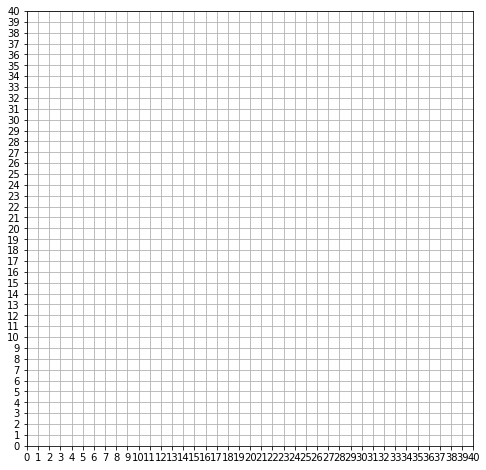

In [4]:
# COMPUTED PARAMETERS

nombre_iterations = nombre_jours*25
writer,fig,graph_h,graph_p,graph_c = init_writer(map_size)

In [5]:
# PLAY

t_start = time.time()

herbivores = population(nombre_individus=10,map_size=map_size,espece=espece_herbivore)
plantes    = population(nombre_individus=10,map_size=map_size,espece=espece_plante)
carnivores = population(nombre_individus=5,map_size=map_size,espece=espece_carnivore)

with writer.saving(fig, "./gifs/GIF_"+str(random.randint(0,1e5))+"_.gif", dpi=70):    
    for i in range(nombre_iterations):

        sys.stdout.write("\riteration: %s/%s" % (i+1,nombre_iterations))

        plantes.reproduce()
        plantes.generate(0.5,espece_plante) # 12.5/jour

        carnivores.search_food(herbivores)
        carnivores.reproduce()
        carnivores.deplacement()
        carnivores.starve()
        carnivores.search_food(herbivores)
        #carnivores.generate(0.02,espece_carnivore) # 0.5/jour

        herbivores.search_food(plantes)
        herbivores.reproduce()
        herbivores.deplacement()
        herbivores.starve()
        #herbivores.generate(0.08,espece_herbivore) # 1/jour

        # stats
        #update_writer(writer,graph_h,graph_p,graph_c,herbivores,plantes,carnivores)

        plantes.demographie.append(plantes.nombre_individus)
        carnivores.demographie.append(carnivores.nombre_individus)
        herbivores.demographie.append(herbivores.nombre_individus)

        #securité
        if plantes.nombre_individus>400 or carnivores.nombre_individus==0:
            print("\nToo many entities -> EXIT")
            break
            #sys.exit("Too many entities")

                
t_exec = time.time()-t_start
print("\ntime :",t_exec,"sec")

iteration: 517/5000
Too many entities -> EXIT


RuntimeError: Error creating movie, return code: 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

##############################

fig = plt.figure(figsize=(10,6))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("iterations")
host.set_ylabel("herbivores")
par1.set_ylabel("carnivores")
par2.set_ylabel("plantes")

p1, = host.plot(herbivores.demographie, color='dodgerblue',label="herbivores")
p2, = par1.plot(carnivores.demographie, color='firebrick', label="carnivores")
p3, = par2.plot(plantes.demographie, color='green', label="plantes")

lns = [p1, p2, p3]
plt.title("Démographies")
host.legend(handles=lns, loc='upper left')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
#par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

#################################

plt.figure(figsize=(10,6))
plt.plot((np.log10(np.array(plantes.demographie)+1)/(np.array(herbivores.demographie)+1)),'orange')
plt.title("Log10 plants/herbivore")
plt.show()